In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

/Users/vk/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def departitionImage(image):
    """ returns (xs, ys, zs, rs) """
    xs = []; ys = []; zs = []; rs = []
    for ilayer in range(30):
        for iy in range(30):
            for ix  in range(30):
                if image[ilayer][iy][ix]>0:
                    xs.append(ix)
                    ys.append(iy)
                    zs.append(ilayer)
                    rs.append(image[ilayer][iy][ix])
    return (xs,ys,zs,rs)
def draw(image_as_3darray):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    xs,ys,zs,rs = departitionImage(image_as_3darray)
    ax.scatter(xs,ys,zs, c='r', marker='o')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Layer")
    plt.show()

In [39]:
npdata = np.load("/Users/vk/software/simulations/data/hgcal/npy/20161126_1156/test.npy")

In [40]:
np.random.shuffle(npdata)
np.linalg.norm(npdata, axis=1)

array([ 20884770.15355348,   6931201.67036047,   7391343.24057302, ...,
        20318853.41146867,  20290515.19998941,  15297490.80746534])

In [45]:
import sklearn.preprocessing as pp
npdata_x = npdata[:, 1:]
npdata_y = npdata[:, 0]
npdata_x_norm = pp.normalize(npdata_x, axis=1)
train_x = npdata_x_norm[:20000]
train_y = npdata_y[:20000]
test_x = npdata_x_norm[20000:]
test_y = npdata_y[20000:]

In [52]:
simit_test = train_x.dot(test_x[0])
energy = simi_test.dot(train_y)/simi_test.sum()

In [53]:
print test_y[0]
print energy

35.0
31.774859348


In [54]:
simi_test = test_x.dot(train_x.transpose())
energies = simi_test.dot(train_y)/simi_test.sum(axis=1)

In [55]:
print energies
print test_y

[ 31.77485935  32.57794004  30.44865444 ...,  31.52380945  32.49424152
  31.41159426]
[ 35.  55.  10. ...,  40.  43.  34.]


((10000,), (10000,))

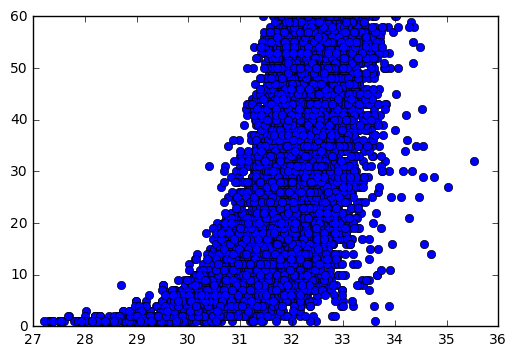

In [60]:
plt.plot(energies, test_y, linestyle="", marker="o")
energies.shape, test_y.shape